In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [3]:
PATH = Path('../../../data/pascal')
list(PATH.iterdir())

[PosixPath('../../../data/pascal/pascal_val2007.json'),
 PosixPath('../../../data/pascal/VOCdevkit'),
 PosixPath('../../../data/pascal/.DS_Store'),
 PosixPath('../../../data/pascal/pascal_train2012.json'),
 PosixPath('../../../data/pascal/pascal_test2007.json'),
 PosixPath('../../../data/pascal/pascal_train2007.json'),
 PosixPath('../../../data/pascal/pascal_val2012.json')]

In [10]:
trn_data = json.load((PATH/'pascal_train2007.json').open())

In [11]:
trn_data.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [12]:
IMAGES, ANNO, CAT = ['images', 'annotations', 'categories']
trn_data[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [24]:
BBOX, IMAGE_ID, CAT_ID, FILE_NAME = ['bbox', 'image_id', 'category_id', 'file_name'] 
trn_data[ANNO][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [14]:
trn_data[CAT][:5]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'},
 {'supercategory': 'none', 'id': 5, 'name': 'bottle'}]

In [19]:
ID, NAME = ['id', 'name']
trn_cat = {o[ID]:o[NAME] for o in trn_data[CAT]}
trn_cat[1]

'aeroplane'

In [25]:
trn_fnm = {o[ID]:o[FILE_NAME] for o in trn_data[IMAGES]}
trn_fnm[12]

'000012.jpg'

In [22]:
trn_ids = [o[ID] for o in trn_data[IMAGES]]
trn_ids[:5]

[12, 17, 23, 26, 32]

In [94]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_data[ANNO]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMAGE_ID]].append((bb, o[CAT_ID]))
len(trn_anno)

2501

In [29]:
img_path = PATH/'VOCdevkit/VOC2007'
list(img_path.iterdir())

[PosixPath('../../../data/pascal/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('../../../data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('../../../data/pascal/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('../../../data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('../../../data/pascal/VOCdevkit/VOC2007/JPEGImages')]

In [30]:
img_path = img_path/'JPEGImages'

In [31]:
trn_anno[12]

[(array([ 96, 155, 269, 350]), 7)]

In [32]:
trn_cat[7]

'car'

In [33]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [51]:
def show_img(img, figsize=None, axes=None):
    if not axes:
        fig, axes = plt.subplots(figsize=figsize)
    axes.imshow(img)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    return axes

In [36]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [37]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [38]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [39]:
im = open_image(img_path/trn_data[IMAGES][0][FILE_NAME])

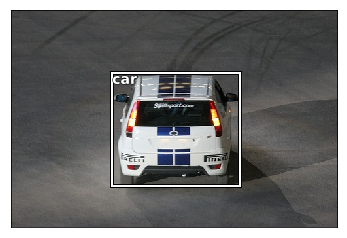

In [63]:
ax = show_img(im)
img_id = trn_data[IMAGES][0][ID]
bbox, cat_id = trn_anno[img_id][0]
bbox = bb_hw(bbox)
#print(trn_anno[img_id][1])
cat = trn_cat[cat_id]
draw_text(ax, (bbox[0], bbox[1]), cat)
draw_rect(ax, bbox)

In [72]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], trn_cat[c], sz=16)

In [73]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(img_path/trn_fnm[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


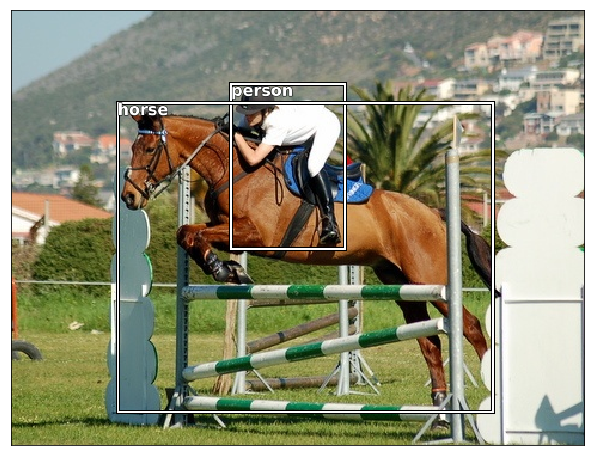

In [74]:
draw_idx(17)

In [75]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [77]:
#Now we have a dictionary from image id to a single bounding box - the largest for that image.
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

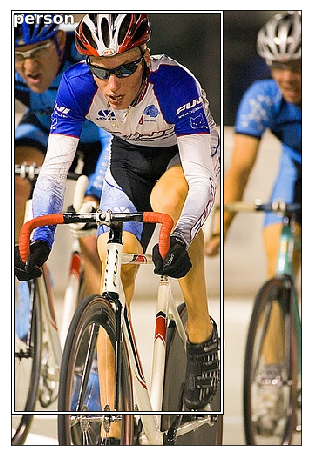

In [85]:
img_name = trn_fnm[23]
ax = show_img(open_image(img_path/img_name), figsize=(15, 8))
(b, c) = trn_lrg_anno[23]
b = bb_hw(b)
draw_rect(ax, b)
draw_text(ax, b[:2], trn_cat[c], 16)

In [86]:
(PATH/'tmp').mkdir(exist_ok = True)
CSV = PATH/'tmp/lrg.csv'

In [96]:
df = pd.DataFrame({'fn': [trn_fnm[o] for o in trn_ids],                  
                   'cat': [trn_cat[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn', 'cat'])
df.to_csv(CSV, index=False)

In [100]:
f_model = resnet34
sz = 224
bs = 64
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [101]:
tfm_model = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfm_model, bs=bs)

In [104]:
x,y = next(iter(md.val_dl))


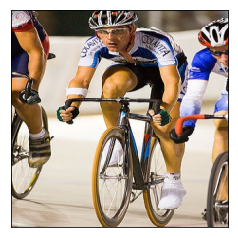

In [105]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [106]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam